# FORECASTING INVENTORY DEMAND IN SMALL AND MEDIUM SIZED ENTERPRISE WITH PREDICTIVE MODELS

###### Objective





#### Data Description
- ProductID (int) – Unique identifier for each product.
- ProductName (object) – Name of the product.
- Category (object) – Product category.
- Price (float) – Price of the product.
- Rating (float) – Customer rating.
- NumReviews (int) – Number of reviews.
- StockQuantity (int) – Stock available.
- Discount (float) – Discount rate.
- Sales (int) – Number of units sold.
- DateAdded (object) – Date when the product was added.
- City (object) – Location of the seller.


Importing necessary libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
print(sys.executable)

C:\Users\USER\anaconda3\python.exe


### Data Preprocessing

In [3]:
data = pd.read_csv("ecom.csv") 

In [4]:
data.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,11/10/2023,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,9/28/2023,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,10/20/2023,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,12/5/2023,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,8/10/2023,Tucson


In [5]:
data.dtypes

ProductID          int64
ProductName       object
Category          object
Price            float64
Rating           float64
NumReviews         int64
StockQuantity      int64
Discount         float64
Sales              int64
DateAdded         object
City              object
dtype: object

In [6]:
print(f"This data has a total of {data.shape[0]} rows and {data.shape[1]} columns" )

This data has a total of 1000 rows and 11 columns


In [7]:
data.dtypes
# checking the data type for each columns stated

ProductID          int64
ProductName       object
Category          object
Price            float64
Rating           float64
NumReviews         int64
StockQuantity      int64
Discount         float64
Sales              int64
DateAdded         object
City              object
dtype: object

In [8]:
data.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


In [9]:
# data['Category'].value_counts()

In [10]:
# data.info

####  Data Cleaning

In [11]:
# Checking for Missing values
data.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

There are no missing values

In [12]:
# Checking for duplicate values
data.duplicated().sum()

0

Also, there are no duplicate values


#### Data Transformation

In [13]:
# Convert'DateAdded' from Object to datetime
data['DateAdded'] = pd.to_datetime(data['DateAdded'], format='%m/%d/%Y')
data["DateAdded"].dtypes


dtype('<M8[ns]')

In [14]:
# Extracting the years months and week from the DateAdded column

data['YearAdded'] = data['DateAdded'].dt.year
data['MonthAdded'] = data['DateAdded'].dt.month
data['DayOfWeekAdded'] = data['DateAdded'].dt.dayofweek  # Monday=0, Sunday=6
data.head()
# data.shape[1]

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,MonthAdded,DayOfWeekAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023,11,4
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023,9,3
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023,10,4
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023,12,1
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023,8,3


In [15]:
data.set_index("MonthAdded")
# data.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,DayOfWeekAdded
MonthAdded,,,,,,,,,,,,,
11,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023,4
9,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023,3
10,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023,4
12,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023,1
8,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,2024-02-13,Baton Rouge,2024,1
7,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,2023-07-01,Worcester,2023,5
10,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,2023-10-29,Raleigh,2023,6


In [16]:
# Feature Engineering
# Creating a feature REVENUE: money generated from business operations, calculated as the sales price X the number of units sold

data["Revenue"] = data["Price"] * data["Sales"]
# data

# now calculating the estimated revenue when the discount as been deducted
data["Revenue_est"] = (data["Price"] * (1- data["Discount"]))
data


,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,MonthAdded,DayOfWeekAdded,Revenue,Revenue_est
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023,11,4,186544.46,368.2852
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023,9,3,313059.96,157.4701
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023,10,4,105310.80,288.3510
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023,12,1,275776.20,77.8770
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023,8,3,595267.92,303.9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,2024-02-13,Baton Rouge,2024,2,1,67509.00,112.1688
996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,2023-07-01,Worcester,2023,7,5,415255.60,163.8460
997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,2023-10-29,Raleigh,2023,10,6,120098.30,90.8852
998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,2023-10-28,Nashville,2023,10,5,298773.36,100.5048


In [17]:
data.head(20)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,MonthAdded,DayOfWeekAdded,Revenue,Revenue_est
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023,11,4,186544.46,368.2852
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023,9,3,313059.96,157.4701
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023,10,4,105310.80,288.3510
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023,12,1,275776.20,77.8770
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023,8,3,595267.92,303.9498
5,6,Headphones,Electronics,93.56,1.3,2435,600,0.48,241,2023-09-21,Louisville,2023,9,3,22547.96,48.6512
6,7,Laptop,Electronics,57.86,3.7,1478,427,0.25,1966,2024-05-08,Cleveland,2024,5,2,113752.76,43.3950
7,8,Laptop,Electronics,201.62,1.7,3073,389,0.10,1795,2023-08-07,Houston,2023,8,0,361907.90,181.4580
8,9,Smartphone,Electronics,485.10,4.1,161,201,0.45,269,2023-06-27,Cape Coral,2023,6,1,130491.90,266.8050
9,10,Smartwatch,Electronics,170.00,3.3,1275,701,0.16,719,2023-10-19,Minneapolis,2023,10,3,122230.00,142.8000


In [18]:
data['City'].value_counts()

City
New York         17
Spokane          17
Palm Bay         17
San Francisco    16
Pittsburgh       15
                 ..
Riverside         5
Worcester         5
Springfield       4
Nashville         4
Brooklyn          3
Name: count, Length: 101, dtype: int64

## Data Visualization

Understanding what product category has more sales using a bar chart to identify high demand

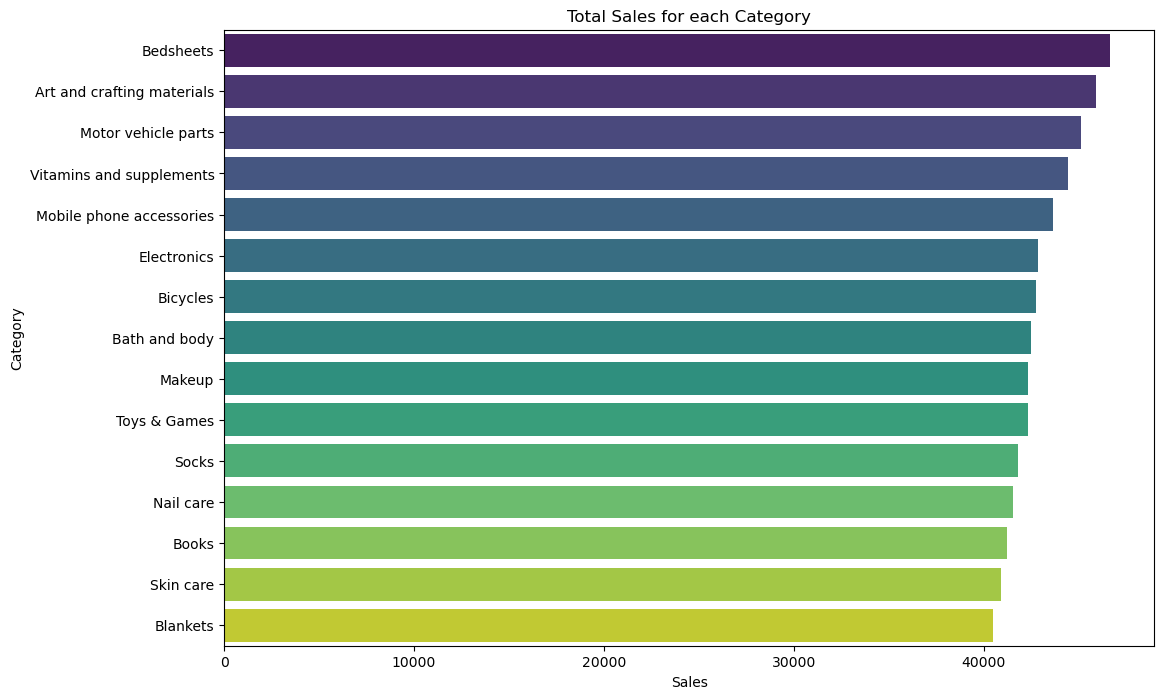

In [19]:
# Understanding what product category has more sales using a bar chart to identify high demand

category_sales = data.groupby('Category')['Sales'].sum().reset_index()
# category_sales is arranged in descending order

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Category', data=category_sales.sort_values("Sales", ascending=False).head(15), palette="viridis")
plt.title("Total Sales for each Category")
plt.show()


In [20]:
print(f"There are about {data['Category'].nunique()} unique categories each having 40 entries") 


There are about 25 unique categories each having 40 entries


In [21]:
data["Category"].uniques.sum()

AttributeError: 'Series' object has no attribute 'uniques'

##### Bar Chart Displaying the Revenue per City

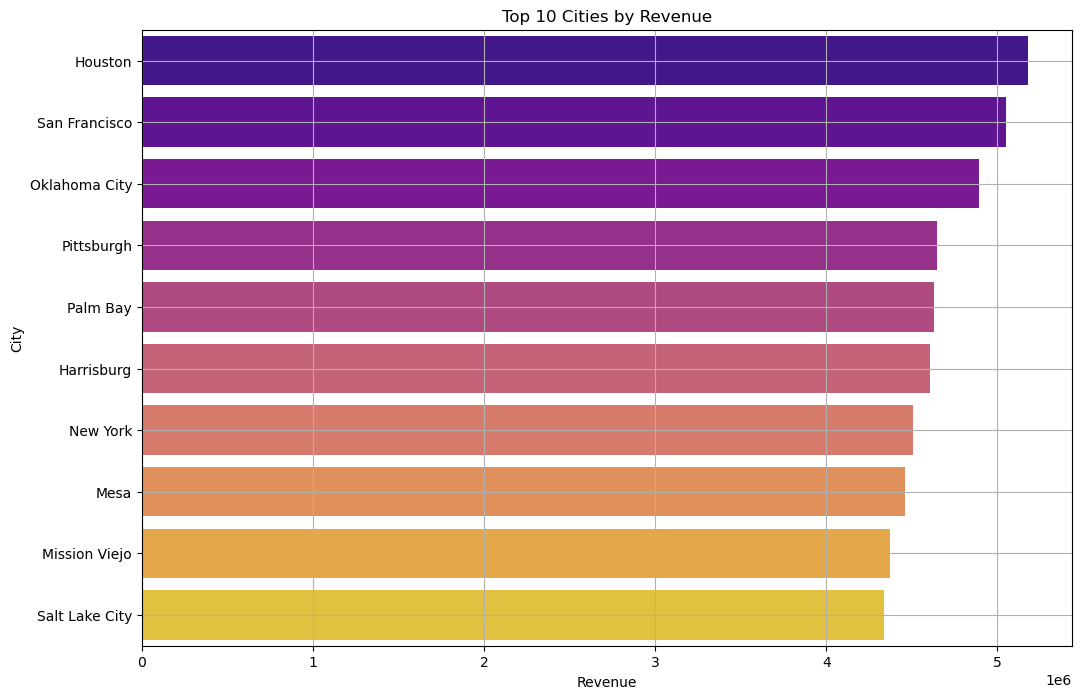

In [22]:
# DataFrame for revenue for each city
city_revenue = data.groupby("City")["Revenue"].sum().reset_index()
city_revenue

plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='City', data=city_revenue.sort_values('Revenue', ascending=False).head(10), palette='plasma')
plt.title('Top 10 Cities by Revenue')
plt.grid(True)
plt.show()

###### Scatter Plot Displaying the Sales for each Price

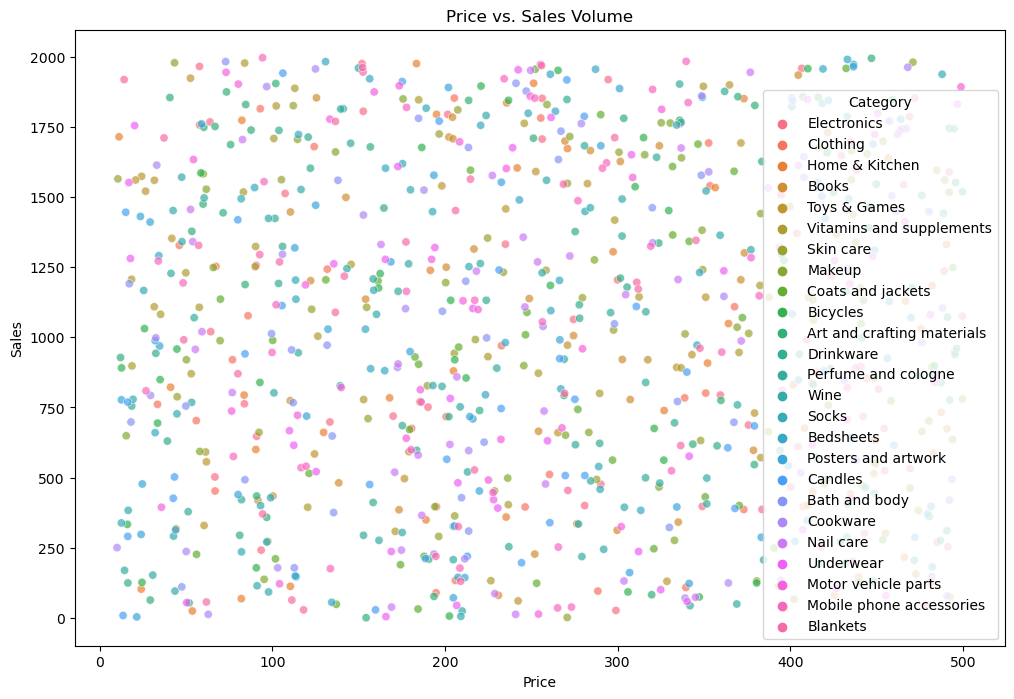

In [23]:
# Observing the relationship between product price and sales

plt.figure(figsize=(12,8))
sns.scatterplot(x='Price', y="Sales", data=data, hue='Category', alpha=0.7)
plt.title('Price vs. Sales Volume')

plt.legend(title="Category")
plt.show()

In [24]:
data.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,MonthAdded,DayOfWeekAdded,Revenue,Revenue_est
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023,11,4,186544.46,368.2852
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023,9,3,313059.96,157.4701
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023,10,4,105310.80,288.3510
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023,12,1,275776.20,77.8770
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023,8,3,595267.92,303.9498


In [25]:
data[data["Category"] == "Bedsheets"]

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,YearAdded,MonthAdded,DayOfWeekAdded,Revenue,Revenue_est
600,601,Silk Sheets,Bedsheets,220.69,3.4,870,12,0.38,1756,2023-10-18,Buffalo,2023,10,2,387531.64,136.8278
601,602,Silk Sheets,Bedsheets,243.09,3.7,1647,566,0.32,1490,2024-02-17,Omaha,2024,2,5,362204.10,165.3012
602,603,Linen Sheets,Bedsheets,456.20,3.0,4660,470,0.31,925,2023-08-04,Los Angeles,2023,8,4,421985.00,314.7780
603,604,Bamboo Sheets,Bedsheets,464.91,5.0,1067,738,0.38,1743,2023-09-21,Oklahoma City,2023,9,3,810338.13,288.2442
604,605,Bamboo Sheets,Bedsheets,34.31,3.9,2951,71,0.46,1291,2023-07-27,San Antonio,2023,7,3,44294.21,18.5274
605,606,Linen Sheets,Bedsheets,402.71,2.6,4234,614,0.06,272,2023-11-04,Cincinnati,2023,11,5,109537.12,378.5474
606,607,Cotton Sheets,Bedsheets,287.23,4.7,4485,341,0.03,1956,2023-12-03,Cleveland,2023,12,6,561821.88,278.6131
607,608,Linen Sheets,Bedsheets,267.12,4.1,4322,370,0.17,816,2024-01-15,Bronx,2024,1,0,217969.92,221.7096
608,609,Linen Sheets,Bedsheets,153.95,1.2,870,667,0.30,1029,2024-01-17,Madison,2024,1,2,158414.55,107.7650
609,610,Bamboo Sheets,Bedsheets,165.60,4.4,3190,292,0.44,1603,2023-11-11,Bonita Springs,2023,11,5,265456.80,92.7360


In [26]:
# Sales per month 